# CNCD INTERVIEW TASKS

### Task-1

- ***Read the “student.csv” and convert the data into multiple sheet with their class wise sheet name.***

In [657]:
#To avoid the import libs again and again just install Pyforest and Imports.
!pip install pyForest

In [658]:
#Importing the Pyforest (It's for Lazy Programmers like me:)
import pyforest

In [659]:
#Read the CSV file
df = pd.read_csv('student.csv')

<IPython.core.display.Javascript object>

In [660]:
df.head()

,Name,Class
0,Maaz,4_Standard
1,Shahzaib,6_Standard
2,A. Baseer,1_Standard
3,M.Hussain,5_Standard
4,Ghufran,4_Standard


In [661]:
#Check the shape of file
df.shape

(42, 2)

> **So our file contains only 2 Coulmns with 42 Records**

In [662]:
#Checking some missing values as it's really small number so we just check the overall missing values of dataset
df.isnull().sum().sum()

0

- Now let's filter them out wrt Standards but let's check the unique value of Class column that's how many unique values which needs to filtered and save in separate sheets of one excel file.

In [663]:
#Check the unique values number
df.Class.nunique()

9

- So we have 9 unique entries in our 'Class' Feature, Now let's check what they are:

In [664]:
#Check the Unique Value Entries
df.Class.unique()

array(['4_Standard', '6_Standard', '1_Standard', '5_Standard',
       '2_Standard', '7_Standard', '3_Standard', '9_Standard',
       '8_Standard'], dtype=object)

In [665]:
#Let's do some filtering and then save into one Excel file with Different sheets name
df1 = df[(df.Class=="1_Standard")]
df2 = df[(df.Class=="2_Standard")]
df3 = df[(df.Class=="3_Standard")]
df4 = df[(df.Class=="4_Standard")]
df5 = df[(df.Class=="5_Standard")]
df6 = df[(df.Class=="6_Standard")]
df7 = df[(df.Class=="7_Standard")]
df8 = df[(df.Class=="8_Standard")]
df9 = df[(df.Class=="9_Standard")]

In [666]:
#Let's check if it's filtered correctly
df2

,Name,Class
5,Hammad,2_Standard
18,Sanaullah,2_Standard
19,Hussain,2_Standard
22,Shahzaib,2_Standard
26,Hammad,2_Standard
33,Hammad,2_Standard


In [667]:
#Create the Excel File 
with pd.ExcelWriter("F:\\final_sheet.xlsx") as writer:
    df1.to_excel(writer, sheet_name='1_Stand', index=False)
    df2.to_excel(writer, sheet_name='2_Stand', index=False)
    df3.to_excel(writer, sheet_name='3_Stand', index=False)
    df4.to_excel(writer, sheet_name='4_Stand', index=False)
    df5.to_excel(writer, sheet_name='5_Stand', index=False)
    df6.to_excel(writer, sheet_name='6_Stand', index=False)
    df7.to_excel(writer, sheet_name='7_Stand', index=False)
    df8.to_excel(writer, sheet_name='8_Stand', index=False)
    df9.to_excel(writer, sheet_name='9_Stand', index=False)

<IPython.core.display.Javascript object>

- In this i have created the Excel file having name 'final_sheet' with 9 different sheets are present in one file wrt Standards.

### Task-2

- Convert the “Log file into CSV”
- Read the “sysmexdata24.log” Given: 
    - Step 1: Convert Log file into CSV. 
    - Step 2: Show Basic Statistics of the Data.
    - Step 3: Create Bar Graph, Clusters to find the outliers of the data. You can create other graphs as well.
    - Step 4: Explain all the steps.


## Step-1: Covert Log File Into CSV


In [668]:
import re
import datetime
f = open("sysmexdata24.log", "r")
File_Content= re.sub('[^a-zA-Z0-9 %|\n\.]', '', f.read())
All_Rows=[]
Row_Count=0
Line_Count=0
Each_Row_Data={}
Total_Lines=len(File_Content.split('\n'))
for each_line in File_Content.split('\n'):
    #Count every line so we can append the last filtered row into the list of dictionaries
    Line_Count=Line_Count+1
    #Get study id (Starts with 4O)
    if each_line.startswith("4O"):
        #Split lines with pipe & get index 3
        each_line_list=each_line.split('|')
        #For first study dont append to list of dictionaries
        if Row_Count != 0:
            All_Rows.append(Each_Row_Data)
        #Counting each study
        Row_Count=Row_Count+1
        #Creating new dictionary for each study id
        Each_Row_Data={}
        #Setting study id for the dictionary
        Each_Row_Data['study_id']=each_line_list[3].strip()[:-1]
    else:
        #Getting data from other valid lines
        each_line_list=each_line.split('|')
        if len(each_line_list) > 5:
            #Remove 1 from the text if not numbers(To avoid removing 1 from date)
            if not each_line_list[2].isdecimal():
                each_line_list[2]=each_line_list[2].replace('1','')
            #If its only integers then its date
            if each_line_list[len(each_line_list)-1].strip().isdecimal():

                Each_Row_Data['Date']=datetime.datetime.strptime(each_line_list[len(each_line_list)-1].strip(), '%Y%m%d%H%M%S').strftime('%Y%m%d')

            #Saving all the data of each study into a dictionary with the name as key
            Each_Row_Data[each_line_list[2]]=each_line_list[3]

    if Line_Count == Total_Lines:
        All_Rows.append(Each_Row_Data)

for Each_Study in All_Rows:
    #Write into CSV Here
    df = pd.DataFrame(All_Rows, index=[1,2,3,4,5,6,7,8,9])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [669]:
df.shape

(9, 60)

> Yes we got the desired Output what we want, Now let's do some preprocessing.

## Step-2: Basic Stats 

In [670]:
#First Let's check the shape of the file
df.shape

(9, 60)

In [671]:
#Let's Check the total columns
df.columns

Index(['study_id', '', 'Date', 'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH',
       'MCHC', 'PLT', 'NEUT%', 'LYMPH%', 'MONO%', 'EO%', 'BASO%', 'NEUT',
       'LYMPH', 'MONO', 'EO', 'BASO', 'IG%', 'IG', 'RDWSD', 'RDWCV', 'MICROR',
       'MACROR', 'PDW', 'MPV', 'PLCR', 'PCT', 'WBCAbnScattergram',
       'Neutropenia', 'Leukocytopenia', 'PLTAbnDistribution',
       'BlastsAbnLympho', 'LeftShift', 'AtypicalLympho', 'NRBC',
       'RBCAgglutination', 'TurbidityHGBInterference', 'IronDeficiency',
       'HGBDefect', 'Fragments', 'IRBC', 'PLTClumps', 'PositiveDiff',
       'PositiveMorph', 'PositiveCount', 'SCATWDF', 'SCATWDFCBC', 'DISTRBC',
       'DISTPLT', 'Microcytosis', 'Hypochromia', 'RBCAbnDistribution',
       'Anisocytosis', 'Anemia', 'ACTIONMESSAGEPLT', 'Lymphopenia'],
      dtype='object')

> 60 Columns with 9 Records but as per our need we just need the selected columns which mentioned in the CSV file so Let's fetch just these one

In [672]:
#Let's fetch our desired columns
df1 = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,23,24,27,28,29,30,11,12,13,14,15]]

In [673]:
df1.columns

Index(['study_id', '', 'Date', 'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH',
       'MCHC', 'PLT', 'RDWSD', 'RDWCV', 'PDW', 'MPV', 'PLCR', 'PCT', 'NEUT%',
       'LYMPH%', 'MONO%', 'EO%', 'BASO%'],
      dtype='object')

In [674]:
df1

,study_id,,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,...,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
1,31DTS02,,20220923,1.69,5.52,15.6,48.8,88.4,28.3,32.0,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
2,30DTS02,,20220923,2.85,5.95,14.2,44.5,74.8,23.9,31.9,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
3,29DTS02,,20220923,1.96,5.81,15.9,48.7,83.8,27.4,32.6,...,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
4,28DTS02,,20220923,1.95,3.64,5.6,20.5,56.3,15.4,27.3,...,23.9,,,,,13.8,51.8,15.4,15.9,3.1
5,27DTS02,,20220923,3.38,5.39,12.8,40.2,74.6,23.7,31.8,...,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1
6,24DTS02,,20220923,5.69,6.38,17.0,51.0,79.9,26.6,33.3,...,13.9,20.0,13.9,56.2,0.21,33.6,46.9,12.3,4.2,3.0
7,20DTS02,,20220923,1.76,5.19,16.0,48.2,92.9,30.8,33.2,...,13.9,17.2,12.8,48.8,0.17,9.2,63.6,19.3,4.5,3.4
8,18DTS02,,20220923,1.84,4.74,13.0,39.3,82.9,27.4,33.1,...,12.9,22.1,16.2,72.8,0.15,44.1,42.4,9.2,1.6,2.7
9,17DTS02,,20220923,2.80,5.19,12.7,40.0,77.1,24.5,31.8,...,17.1,22.0,13.3,51.5,0.20,12.1,70.4,12.1,3.6,1.8


In [675]:
df1.describe().T

,count,unique,top,freq
study_id,9,9,20DTS02,1
,9,1,,9
Date,9,1,20220923,9
WBC,9,9,2.80,1
RBC,9,8,5.19,2
HGB,9,9,12.7,1
HCT,9,9,51.0,1
MCV,9,9,74.6,1
MCH,9,8,27.4,2
MCHC,9,8,31.8,2


> There is something Fishy, We got only max value and frequency(mode) which indicates that dtype would be wrong, Let's check it.

In [676]:
#Let's check some info first
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  9 non-null      object
 1             9 non-null      object
 2   Date      9 non-null      object
 3   WBC       9 non-null      object
 4   RBC       9 non-null      object
 5   HGB       9 non-null      object
 6   HCT       9 non-null      object
 7   MCV       9 non-null      object
 8   MCH       9 non-null      object
 9   MCHC      9 non-null      object
 10  PLT       9 non-null      object
 11  RDWSD     9 non-null      object
 12  RDWCV     9 non-null      object
 13  PDW       9 non-null      object
 14  MPV       9 non-null      object
 15  PLCR      9 non-null      object
 16  PCT       9 non-null      object
 17  NEUT%     9 non-null      object
 18  LYMPH%    9 non-null      object
 19  MONO%     9 non-null      object
 20  EO%       9 non-null      object
 21  BASO%     9 non-null

> Yes, as we suspected we have Integer and Float Values but there dtype is Object so let's change this to Float-64

In [677]:
#Let's change the data type of All the columns
df1 = df1.astype({'Date': 'datetime64[ns]','WBC': 'float64','RBC': 'float64','HGB': 'float64','HCT': 'float64','MCV': 'float64','MCH': 'float64','MCHC': 'float64','PLT': 'float64','RDWSD': 'float64','RDWCV': 'float64','NEUT%': 'float64','LYMPH%': 'float64','MONO%': 'float64','EO%': 'float64','BASO%': 'float64'})

In [678]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   study_id  9 non-null      object        
 1             9 non-null      object        
 2   Date      9 non-null      datetime64[ns]
 3   WBC       9 non-null      float64       
 4   RBC       9 non-null      float64       
 5   HGB       9 non-null      float64       
 6   HCT       9 non-null      float64       
 7   MCV       9 non-null      float64       
 8   MCH       9 non-null      float64       
 9   MCHC      9 non-null      float64       
 10  PLT       9 non-null      float64       
 11  RDWSD     9 non-null      float64       
 12  RDWCV     9 non-null      float64       
 13  PDW       9 non-null      object        
 14  MPV       9 non-null      object        
 15  PLCR      9 non-null      object        
 16  PCT       9 non-null      object        
 17  NEUT%     9 non-null

In [679]:
#Check the missing values
df1.isnull().sum()

study_id    0
            0
Date        0
WBC         0
RBC         0
HGB         0
HCT         0
MCV         0
MCH         0
MCHC        0
PLT         0
RDWSD       0
RDWCV       0
PDW         0
MPV         0
PLCR        0
PCT         0
NEUT%       0
LYMPH%      0
MONO%       0
EO%         0
BASO%       0
dtype: int64

> Quite Strange we have missing values in these all 4 Object Columns. Let's check the 4th Row of PDW

In [680]:
#Now we have remaining 4 features having dtype Object but there are some missing values in these features so we can't convert them into float64
df1.PDW.loc[4]

''

> Yup, It's not the missing Values but the String which protect this to change the type from Object to Float, Let's handle this


In [681]:
#Let's change this value with mode of the feature
df1.MPV.loc[4] = df1.MPV.mode()[0]
df1.PDW.loc[4] = df1.PDW.mode()[1]



c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [682]:
df1.head()

,study_id,,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,...,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
1,31DTS02,,2022-09-23,1.69,5.52,15.6,48.8,88.4,28.3,32.0,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
2,30DTS02,,2022-09-23,2.85,5.95,14.2,44.5,74.8,23.9,31.9,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
3,29DTS02,,2022-09-23,1.96,5.81,15.9,48.7,83.8,27.4,32.6,...,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
4,28DTS02,,2022-09-23,1.95,3.64,5.6,20.5,56.3,15.4,27.3,...,23.9,13.7,13.3,,,13.8,51.8,15.4,15.9,3.1
5,27DTS02,,2022-09-23,3.38,5.39,12.8,40.2,74.6,23.7,31.8,...,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1


> So we have overcome this issue, Let's handle remiaing Object feature with same approach

In [683]:
df1.PLCR.loc[4] = df1.PLCR.mode()[1]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [684]:
df1.head()

,study_id,,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,...,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
1,31DTS02,,2022-09-23,1.69,5.52,15.6,48.8,88.4,28.3,32.0,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
2,30DTS02,,2022-09-23,2.85,5.95,14.2,44.5,74.8,23.9,31.9,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
3,29DTS02,,2022-09-23,1.96,5.81,15.9,48.7,83.8,27.4,32.6,...,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
4,28DTS02,,2022-09-23,1.95,3.64,5.6,20.5,56.3,15.4,27.3,...,23.9,13.7,13.3,32.8,,13.8,51.8,15.4,15.9,3.1
5,27DTS02,,2022-09-23,3.38,5.39,12.8,40.2,74.6,23.7,31.8,...,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1


In [685]:
df1.PCT.loc[4] = df1.PCT.mode()[0]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [686]:
df1.head()

,study_id,,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,...,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
1,31DTS02,,2022-09-23,1.69,5.52,15.6,48.8,88.4,28.3,32.0,...,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
2,30DTS02,,2022-09-23,2.85,5.95,14.2,44.5,74.8,23.9,31.9,...,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
3,29DTS02,,2022-09-23,1.96,5.81,15.9,48.7,83.8,27.4,32.6,...,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
4,28DTS02,,2022-09-23,1.95,3.64,5.6,20.5,56.3,15.4,27.3,...,23.9,13.7,13.3,32.8,0.21,13.8,51.8,15.4,15.9,3.1
5,27DTS02,,2022-09-23,3.38,5.39,12.8,40.2,74.6,23.7,31.8,...,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1


>  Finally all Categorical Features also filled up

In [687]:
#Let's Change the data type of these features now
df1 = df1.astype({'MPV': 'float64','PDW': 'float64','PLCR': 'float64','PCT': 'float64'})

In [688]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   study_id  9 non-null      object        
 1             9 non-null      object        
 2   Date      9 non-null      datetime64[ns]
 3   WBC       9 non-null      float64       
 4   RBC       9 non-null      float64       
 5   HGB       9 non-null      float64       
 6   HCT       9 non-null      float64       
 7   MCV       9 non-null      float64       
 8   MCH       9 non-null      float64       
 9   MCHC      9 non-null      float64       
 10  PLT       9 non-null      float64       
 11  RDWSD     9 non-null      float64       
 12  RDWCV     9 non-null      float64       
 13  PDW       9 non-null      float64       
 14  MPV       9 non-null      float64       
 15  PLCR      9 non-null      float64       
 16  PCT       9 non-null      float64       
 17  NEUT%     9 non-null

> Now all features are the same actual data types that is the Float

### Steps which i followed so far
- With the help of some basic operations we check the dtypes of features
- We seen that we are unable to change the dtype of some feature due to some missing value but there is no missing values instead of string('')
- We change the approach and treat these features as a categorical and replace this string to the Mode.
- Finally we have all the filled value with right data type i.e. Float-64

In [689]:
#Let's check the Outliers
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,9.0,2.657778,1.283177,1.69,1.84,1.96,2.85,5.69
RBC,9.0,5.312222,0.790376,3.64,5.19,5.39,5.81,6.38
HGB,9.0,13.644444,3.405184,5.60,12.80,14.20,15.90,17.00
HCT,9.0,42.355556,9.303643,20.50,40.00,44.50,48.70,51.00
MCV,9.0,78.966667,10.467330,56.30,74.80,79.90,83.80,92.90
MCH,9.0,25.333333,4.372070,15.40,23.90,26.60,27.40,30.80
MCHC,9.0,31.888889,1.829238,27.30,31.80,32.00,33.10,33.30
PLT,9.0,184.222222,83.541573,90.00,136.00,154.00,204.00,364.00
RDWSD,9.0,41.711111,4.691866,35.30,38.10,41.10,46.20,46.80
RDWCV,9.0,15.600000,3.370831,12.90,13.90,14.60,15.80,23.90


> One way to check the Outliers are the Describe Function, We checked the Mean and Max Value if there is some abnormal values its mean that Outliers are present in it, Upon our observation it seems that there is very few outlier present in some feature like PLT, PCT and NEUT%. Let's check with the help of Visualization and **BOX PLOT** seems to be the best choice for this.

In [690]:
#Let's separate the numeric features
df_num = df1.select_dtypes(include = ['float64', 'int64'])

> As we find the Outliers means we should be worked on the Numerical Features that's why i separate the Numeric columns and also that the reason to change the dtype to FLOAT. Only object feature i.e study_id has been removed.

In [691]:
df_num.head()

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDWSD,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
1,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117.0,45.4,15.0,19.5,13.3,54.5,0.16,7.1,69.8,14.8,5.9,2.4
2,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189.0,38.1,15.8,13.7,11.1,32.8,0.21,4.9,67.4,19.3,4.9,3.5
3,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204.0,41.1,14.6,15.5,12.0,40.5,0.24,6.6,68.9,15.3,6.6,2.6
4,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364.0,46.7,23.9,13.7,13.3,32.8,0.21,13.8,51.8,15.4,15.9,3.1
5,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256.0,35.3,13.3,14.0,11.6,37.0,0.30,10.9,64.8,12.4,9.8,2.1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

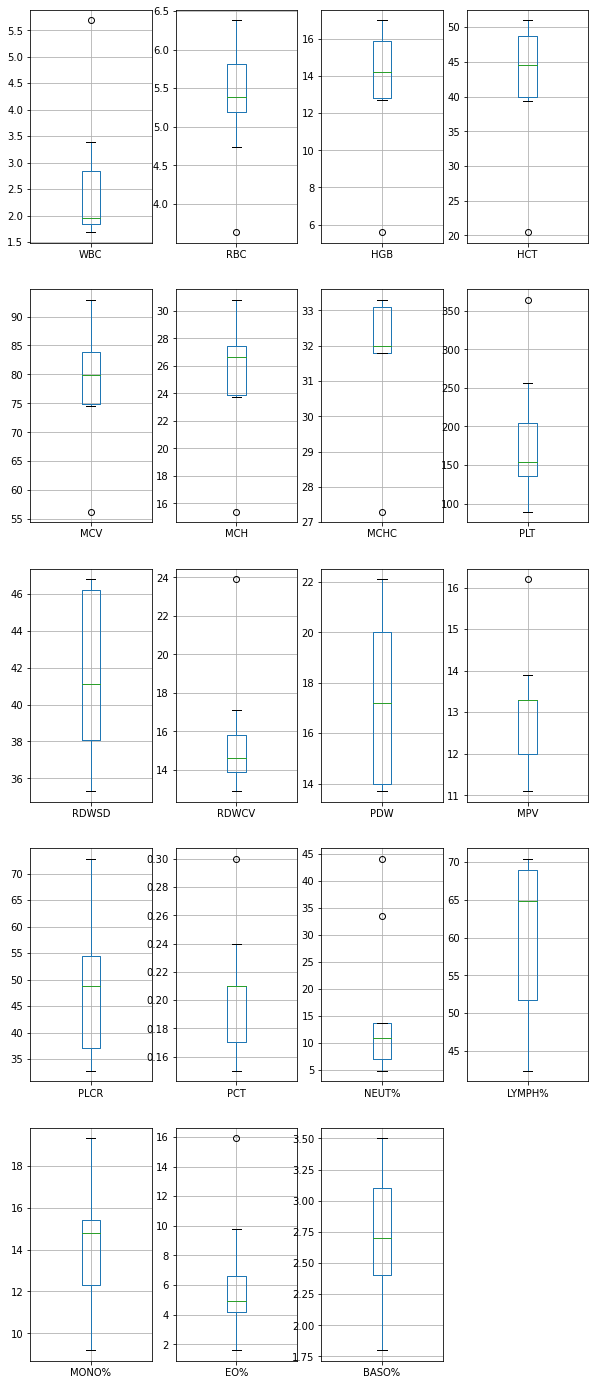

In [692]:
c=1
plt.figure(figsize=(10,30))
for i in df_num:
    plt.subplot(6,4,c)
    df1.boxplot(column=i)
    c=c+1
plt.show()

> So yes our assumption from describe function is right and there is some outliers are present. Let's try to remove the outliers for some feature but remember you must have the domain knowledge to remove these outliers as sometimes abnormal values are not the abnormal but the special case and we might loss cruical info because of this, Currently i removed the outliers for PCT and NEUT%

> First we check the distribution of the features then appropriate action has been applied for outliers removal.

array([[<AxesSubplot:title={'center':'PCT'}>]], dtype=object)

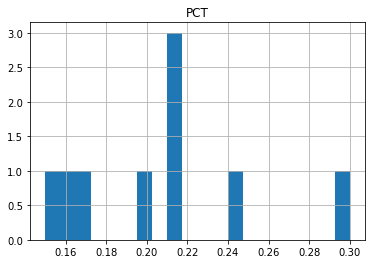

In [693]:
df1.hist(column='PCT',bins=20)

array([[<AxesSubplot:title={'center':'NEUT%'}>]], dtype=object)

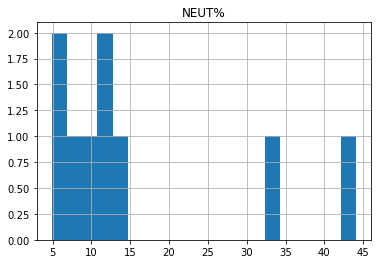

In [694]:
df1.hist(column='NEUT%',bins=20)

> So these two features are not normally distributed so IQR is the best option here, Let's apply

In [695]:
#It's Quite simple just use simple math

IQR = df1['PCT'].quantile(0.75) - df1['PCT'].quantile(0.25)
LWhisker = df1['PCT'].quantile(0.25) - (1.5*IQR)
HWhisker = df1['PCT'].quantile(0.75) + (1.5*IQR)
print('For PCT we have Low Whisker value is {} while for High Whisker value is {}'.format(LWhisker, HWhisker))

IQR1 = df1['NEUT%'].quantile(0.75) - df1['NEUT%'].quantile(0.25)
LWhisker = df1['NEUT%'].quantile(0.25) - (1.5*IQR)
HWhisker = df1['NEUT%'].quantile(0.75) + (1.5*IQR)
print('For NEUT% we have Low Whisker value is {} while for High Whisker value is {}'.format(LWhisker, HWhisker))

For PCT we have Low Whisker value is 0.11000000000000004 while for High Whisker value is 0.26999999999999996
For NEUT% we have Low Whisker value is 7.04 while for High Whisker value is 13.860000000000001


In [696]:
#Capped the Outliers
#Higher Whisker
df1['PCT'] = np.where(df1['PCT']>0.26, 0.26, df1['PCT'])
df1['NEUT%'] = np.where(df1['NEUT%']>13.86, 13.86, df1['NEUT%'])

#Low Whisker
df1['PCT'] = np.where(df1['PCT']<0.11, 0.11, df1['PCT'])
df1['NEUT%'] = np.where(df1['NEUT%']<7.04, 7.04, df1['NEUT%'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> Outliers are properly capped let's check again with the help of BOX Plot

<AxesSubplot:>

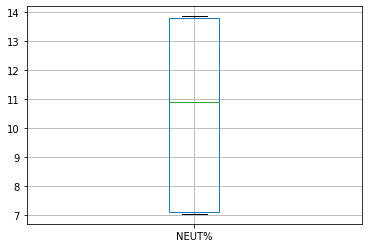

In [697]:
df1.boxplot(column='NEUT%')

<AxesSubplot:>

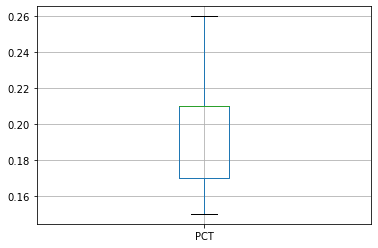

In [698]:
df1.boxplot(column='PCT')

> So that's how we tackle the Ouliers but always always remembered that it should not be removed without the proper domain knowledge otherwise you end up with nothing but mishap.

> If we need to use this data set for model training we must check the Multicolinearity in this as it's a numerical dataset so let's check the multicolinearity with the help of Correlation.

In [699]:
#Let's check the correlation
df1.corr()

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,RDWSD,RDWCV,PDW,MPV,PLCR,PCT,NEUT%,LYMPH%,MONO%,EO%,BASO%
WBC,1.000000,0.568425,0.291137,0.280497,-0.126333,-0.035947,0.249271,0.000378,-0.665825,-0.214606,0.101322,-0.055149,0.023770,0.395805,0.380487,-0.291640,-0.262312,-0.129899,-0.008366
RBC,0.568425,1.000000,0.884729,0.897494,0.552144,0.608376,0.753502,-0.500071,-0.573748,-0.694339,0.118281,-0.331981,0.078738,0.213485,-0.443614,0.289893,0.105393,-0.582646,0.007525
HGB,0.291137,0.884729,1.000000,0.997091,0.870585,0.902898,0.922003,-0.751864,-0.324492,-0.844311,0.329981,-0.092077,0.361429,-0.120078,-0.469406,0.244241,0.100274,-0.751732,0.027265
HCT,0.280497,0.897494,0.997091,1.000000,0.858977,0.886032,0.896855,-0.731950,-0.310973,-0.821641,0.300571,-0.142786,0.316970,-0.098907,-0.518454,0.302691,0.131845,-0.726063,0.011772
MCV,-0.126333,0.552144,0.870585,0.858977,1.000000,0.992239,0.870600,-0.850518,0.029991,-0.808130,0.460869,0.122193,0.538361,-0.435230,-0.456157,0.243849,0.084858,-0.760536,-0.028688
MCH,-0.035947,0.608376,0.902898,0.886032,0.992239,1.000000,0.922834,-0.867512,-0.068574,-0.857506,0.476474,0.138819,0.562052,-0.396639,-0.405510,0.182801,0.039511,-0.806977,-0.013936
MCHC,0.249271,0.753502,0.922003,0.896855,0.870600,0.922834,1.000000,-0.851897,-0.386087,-0.946513,0.487241,0.132727,0.564697,-0.213045,-0.250284,0.055454,-0.127945,-0.886757,-0.054323
PLT,0.000378,-0.500071,-0.751864,-0.731950,-0.850518,-0.867512,-0.851897,1.000000,0.031150,0.746614,-0.767098,-0.425608,-0.791247,0.639995,0.174005,-0.010211,0.200405,0.951336,0.105836
RDWSD,-0.665825,-0.573748,-0.324492,-0.310973,0.029991,-0.068574,-0.386087,0.031150,1.000000,0.527015,0.165506,0.148790,0.010890,-0.487900,-0.079869,0.261810,0.294925,0.177850,-0.014532
RDWCV,-0.214606,-0.694339,-0.844311,-0.821641,-0.808130,-0.857506,-0.946513,0.746614,0.527015,1.000000,-0.350170,-0.080069,-0.501742,0.102413,0.258428,-0.045434,0.204513,0.757526,0.134916


> Multicolinearity is this if we have the independent features with highly correlated with each other having value more than 90% so we remove the one feature and pick the other one like PDW and PLCR are highly correlated with each other. For better view let's plot this correlation graph with the help of seaborn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

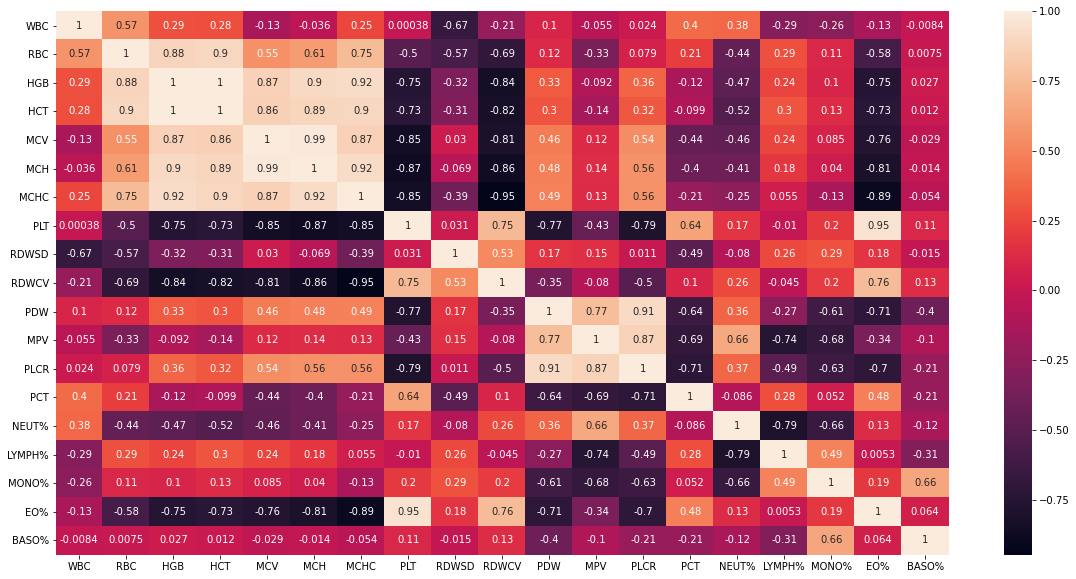

In [708]:
#Correlation with the help of Seaborn
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)

> It's understandable like Lighter Value have **Positive Correlated Values** while the Darker one having **Negative Correlated Values** and both are bad for our model, It's just consume more power more data nothing else and yes that's the technique that how we select the our Feature for numerical dataset.

> ***So let's end UP this notebook here, I am trying to check the Stats for this dataset and handled the well known issues which we faced, As Features are not properly labeled also i have no domain knowlegde regarding the Bioinformatics and Genetics Problems so that's why we didn't get the proper results from these numbers but YES data is quite clean and ready for model training if we just drop the highly Correlated Features.***